In [1]:
#import modules
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
#read csv into a dataframe
numts=pd.read_csv(r'Z:\balint\numt/3numt_array.csv')
numts=numts[numts['mt_start']<17245]#filter out the abnormal numts coming from the dmtDNA alignment
numts=numts.sort_values(by='mt_start')

In [3]:
#try to get as different colors as possible
colors=pd.Series(['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6',
                  '#bcf60c','#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3',
                  '#808000', '#ffd8b1','#000075', '#00FF7F','#000000'], index=np.arange(1,22,1))

In [4]:
#function for visualizing numts as horizontal barcharts
def horizontal_numts(row):
    global numt_tracker
    try:
        axs[0].barh(numt_tracker,row['mt_length'],left=row['mt_start'],height=1,
                 color=colors[int(row['g_id'])])
    except:
        axs[0].barh(numt_tracker,row['mt_length'],left=row['mt_start'],height=0.5,
                 color='grey')
    numt_tracker+=1

In [5]:
#get custom legend colors
custom_lines_color=colors.apply(lambda color: Line2D([0],[0],
                                                         color=color,
                                                         lw=0,
                                                         marker='o',
                                                        markersize=7)).tolist()

In [6]:
#function for drawing brackets to annotate each mitochondrial part
def annotate_mitochondrion(ax, xspan, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin
    ymin, ymax = ax.get_ylim()
    yspan = 20
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:resolution//2+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = ymin + (.15*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=1)

    ax.text((xmax+xmin)/2., ymin+.2*yspan, text, ha='center', va='bottom', fontsize=12.5,rotation=70)

In [7]:
#function for drawing brackets to annotate each repeat family
def annotate_repeats(ax, xspan, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin
    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:resolution//2+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = ymin + (.15*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=1)

    ax.text((xmax+xmin)/2., ymin+.2*yspan, text, ha='center', va='bottom')

In [8]:
#read in the mitochondrial annotation and add d-loop
mitos=pd.read_csv(r'Z:\balint\numt/mitos_annotation.bed',sep='\t',header=None)
mitos.columns=['MT','START','END','DESCRIPTION','SIG','STRAND']
mitos.loc[len(mitos)]=['MT',15445,17245,'D-loop',0.001,'+']

In [9]:
df=pd.read_csv(r'Z:\balint\numt/repeatmasker_results.csv',index_col=0)

In [10]:
repeat_family_indices=[]
repeat_families=[]
with open(r'Z:\balint\numt/repeat_families.txt')as infile:
    content=infile.readlines()
    repeat_family_indices=content[0].rsplit()[0].split(',')
    for line in content[1:]:
        repeat_families.append(line.rsplit()[0].split(','))
repeat_families=pd.Series(repeat_families,index=repeat_family_indices)
repeat_families

Low_complexity         [A-rich, GC_rich, AT_rich, GA-rich, CT-rich]
LINE              [L1ME4a, L1MA4, L2a, L1MEe, L1M5, L1M4c, L1MA5...
SINE               [MIRb, CSINE1, MIRc, CSINE3A, CSINE2, MIR3, MIR]
Simple_repeat     [(GA)n, (CTTA)n, (TAAA)n, (TA)n, (CATATA)n, (T...
LTR                 [LTR27_OC, MLT1A, MLT1A1, LTR22_OC, ERVNOC_LTR]
DNA                                        [MER5A, MER5A1, Tigger7]
tRNA              [tRNA-Ser-TCA(m), tRNA-Leu-TTA(m), tRNA-Gln-CAA_]
dtype: object

In [11]:
repeat_xtick_labels=[]
repeat_families.apply(lambda repeat_list:repeat_xtick_labels.append(repeat_list))
repeat_xtick_labels=np.concatenate(repeat_xtick_labels)
repeat_xtick_labels

array(['A-rich', 'GC_rich', 'AT_rich', 'GA-rich', 'CT-rich', 'L1ME4a',
       'L1MA4', 'L2a', 'L1MEe', 'L1M5', 'L1M4c', 'L1MA5', 'L2', 'L1MCa',
       'L1MC', 'L1A_Oc', 'L1MA6', 'L1B_Oc', 'L1MD', 'L1MEg', 'L1MC4',
       'L1MDa', 'L2b', 'L1MB7', 'L1MB3', 'L1M2', 'L1ME3A', 'L1MB4',
       'L1M4', 'MIRb', 'CSINE1', 'MIRc', 'CSINE3A', 'CSINE2', 'MIR3',
       'MIR', '(GA)n', '(CTTA)n', '(TAAA)n', '(TA)n', '(CATATA)n',
       '(TC)n', '(CA)n', '(T)n', '(TAA)n', '(TTTA)n', '(TG)n', '(TTTTC)n',
       '(CGTG)n', 'LTR27_OC', 'MLT1A', 'MLT1A1', 'LTR22_OC', 'ERVNOC_LTR',
       'MER5A', 'MER5A1', 'Tigger7', 'tRNA-Ser-TCA(m)', 'tRNA-Leu-TTA(m)',
       'tRNA-Gln-CAA_'], dtype='<U15')

In [12]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


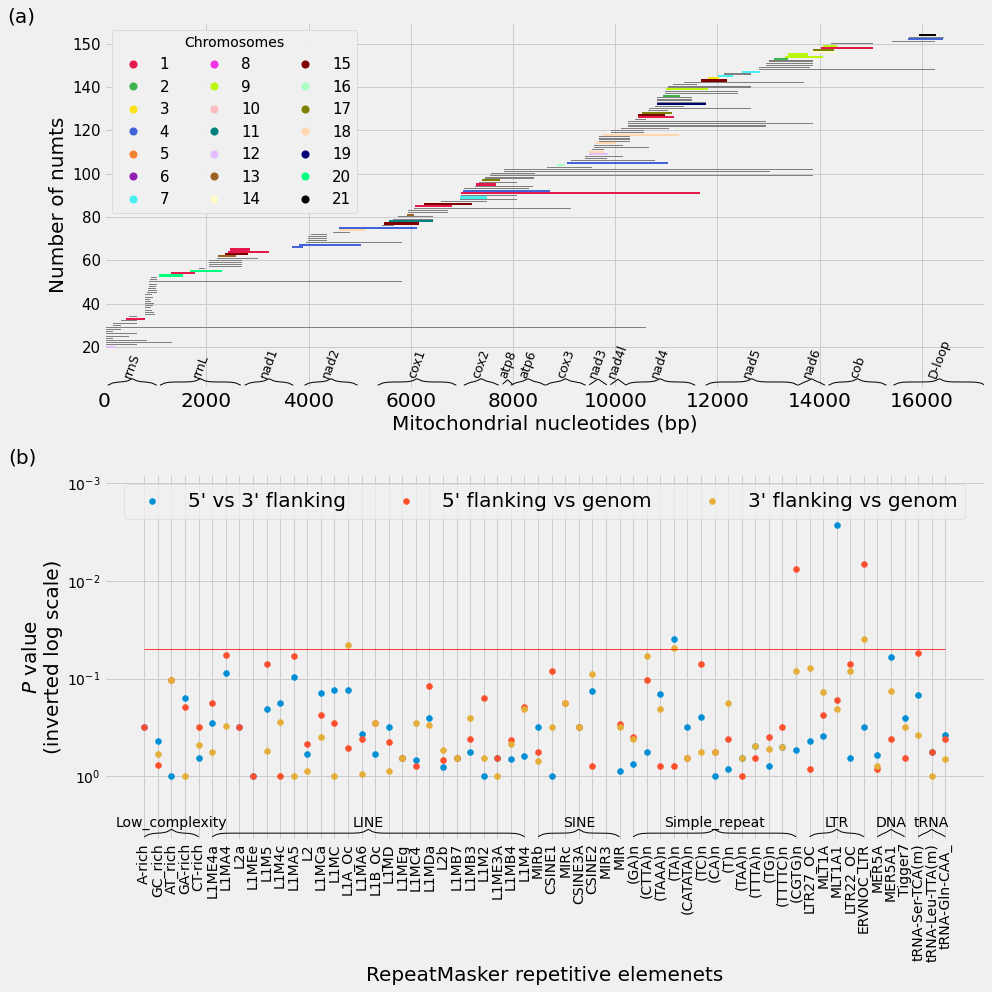

In [43]:
#visualize the numts
plt.style.use('fivethirtyeight')
trial_numts=numts[(numts['mt_start']+numts['mt_length'])<17245]
fig,axs=plt.subplots(2,1,figsize=(14,14))
axs[0].set_ylim(-19,150)
axs[0].set_xlim(0,17245)
axs[0].set_ylabel('Number of numts', fontsize=20)
axs[0].set_xlabel('Mitochondrial nucleotides (bp)', fontsize=20)
axs[0].set_xticklabels([0,2000,4000,6000,8000,10000,12000,14000,16000,17245,''],fontsize=20)
axs[0].set_yticklabels(['',20,40,60,80,100,120,140,150],fontsize=15)

numt_tracker=0
trial_numts.apply(horizontal_numts,axis=1)

legend=axs[0].legend(custom_lines_color,colors.index.values, loc='upper left', title='Chromosomes',
                  fontsize=15,ncol=3)
axs[0].add_artist(legend)
axs[0].text(-1900, 150,'(a)', fontsize=20)

for index, start in enumerate(mitos['START']):
    if (mitos['END'][index]-start)>100:
        annotate_mitochondrion(axs[0],(start,mitos['END'][index]),mitos['DESCRIPTION'][index])
        
upstream_downstream = axs[1].scatter(x = df.columns.values, y = df.loc['upstream_downstream'])
upstream_sample = axs[1].scatter(x = df.columns.values, y = df.loc['upstream_sample'])
downstream_sample = axs[1].scatter(x = df.columns.values, y = df.loc['downstream_sample'])
axs[1].plot(df.columns.values, (len(df.columns.values) * [0.05]), 'r',linewidth=0.75)
axs[1].legend((upstream_downstream, upstream_sample, downstream_sample),
          ("5' vs 3' flanking", "5' flanking vs genom",
           "3' flanking vs genom"),
           fontsize = 20,
           ncol = 3,
           loc = 'upper center')
axs[1].set_ylabel('$\it{P}$ value\n(inverted log scale)', fontsize = 20)
axs[1].set_xlabel('RepeatMasker repetitive elemenets', fontsize = 20)
axs[1].set_xticklabels(repeat_xtick_labels, rotation = 90)
axs[1].set_yscale('log')
axs[1].set_ylim([10**-3.1, 10**0.65])
axs[1].invert_yaxis()
axs[1].text(-10,10**-3.2,'(b)', fontsize=20)

bracket_start=0
for index, repeat_family in enumerate(repeat_families):
    bracket_end=(bracket_start+len(repeat_family))-1
    annotate_repeats(axs[1], (bracket_start,bracket_end),repeat_families.index.values[index])
    bracket_start+=len(repeat_family)
plt.tight_layout()
plt.savefig('../results/short_comm_fig.png',dpi=100)